In [1]:
# Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, make_scorer, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC

In [2]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
# Data loading

df1 = pd.read_csv("C:/Users/chole/Desktop/UCI_Heart_Disease/df_1.csv")
df2 = pd.read_csv("C:/Users/chole/Desktop/UCI_Heart_Disease/df_2.csv")

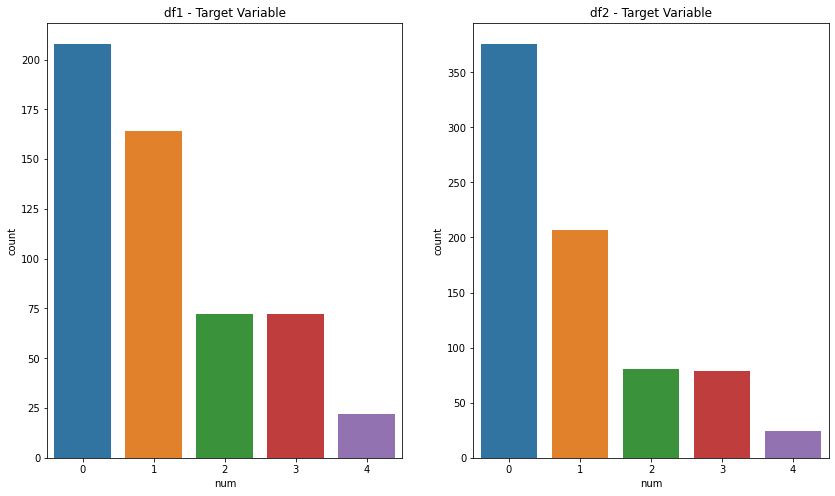

In [4]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.countplot(df1.loc[:,"num"]).set_title("df1 - Target Variable")

plt.subplot(1,2,2)
sns.countplot(df2.loc[:,"num"]).set_title("df2 - Target Variable")

plt.show()

In [5]:
df1.loc[:,"num"] = df1.loc[:,"num"].map({0:0, 1:1, 2:2, 3:2, 4:2})
df2.loc[:,"num"] = df2.loc[:,"num"].map({0:0, 1:1, 2:2, 3:2, 4:2})

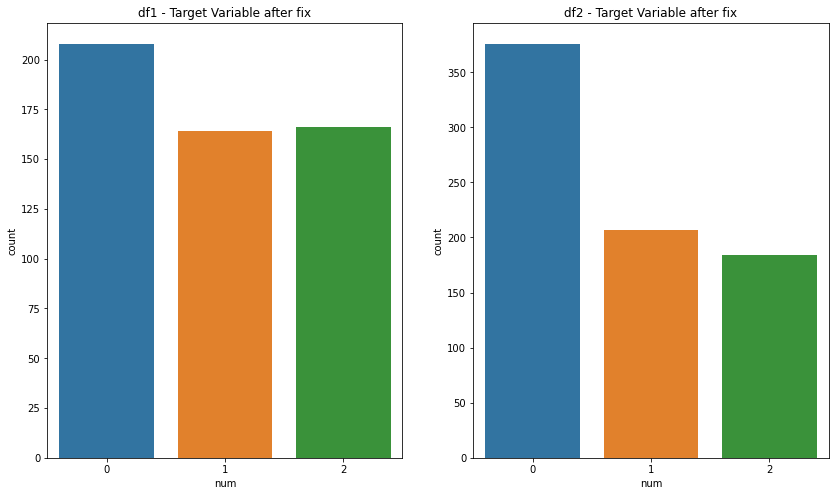

In [6]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.countplot(df1.loc[:,"num"]).set_title("df1 - Target Variable after fix")

plt.subplot(1,2,2)
sns.countplot(df2.loc[:,"num"]).set_title("df2 - Target Variable after fix")

plt.show()

In [7]:
# Data split

X1 = df1.drop(columns="num")
y1 = df1.num

X2 = df2.drop(columns="num")
y2 = df2.num

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,
                                                        test_size=0.2,
                                                        random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,
                                                        test_size=0.2,
                                                        random_state=42)

In [8]:
# Column transformer for df1 and df2

column_t_1 = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), ["sex", "cp", "dataset", "fbs", "restecg", "exang", "slope"]),
    (StandardScaler(), ["age", "trestbps", "chol", "thalch", "oldpeak"]),
    remainder="passthrough"
)

column_t_2 = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), ["sex", "cp", "dataset", "fbs", "restecg", "exang"]),
    (StandardScaler(), ["age", "trestbps", "chol", "thalch", "oldpeak"]),
    remainder="passthrough"
)


kNN: 0.590698 (0.051163)
Tree: 0.630233 (0.094437)
LR: 0.697674 (0.064112)
NuSVC: 0.632558 (0.027121)


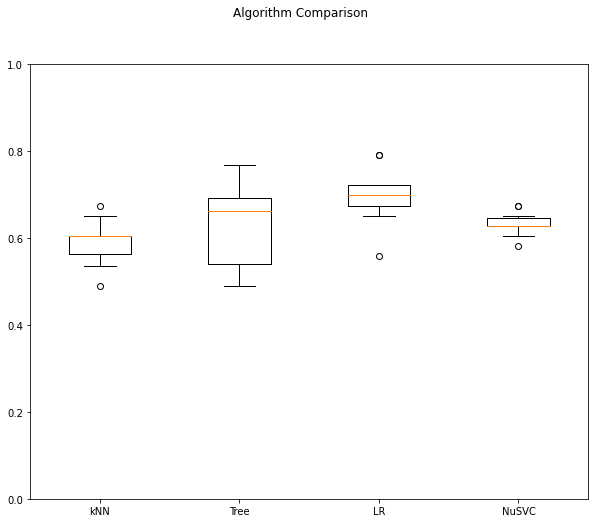

In [9]:
# Models Dict

models = {"kNN": KNeighborsClassifier(n_neighbors=5),
          "Tree": DecisionTreeClassifier(),
          "LR": LogisticRegression(max_iter=10000),
          "NuSVC": NuSVC(max_iter=10000)}

# Lists for results stores

names = []
results = []


# Loop through models

for name, model in models.items():
    pipe = Pipeline([
        ("preProc", column_t_1),
        ("model", model)
    ])

    cv_res = cross_val_score(pipe, X1_train, y1_train, cv=10, scoring=make_scorer(recall_score, average='micro'))

    results.append(cv_res)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_res.mean(), cv_res.std()))

# boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [10, 8]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)  # all on the same box
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylim(0, 1)
plt.show()

kNN: 0.665812 (0.058072)
Tree: 0.688630 (0.075372)
LR: 0.735484 (0.061879)
NuSVC: 0.699921 (0.048843)


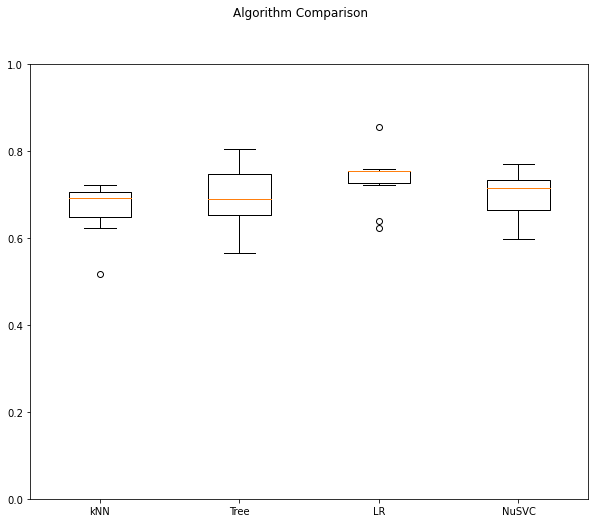

In [10]:
# Models Dict

models = {"kNN": KNeighborsClassifier(n_neighbors=5),
          "Tree": DecisionTreeClassifier(),
          "LR": LogisticRegression(max_iter=10000),
          "NuSVC": NuSVC(max_iter=10000)}

# Lists for results stores

names = []
results = []


# Loop through models

for name, model in models.items():
    pipe = Pipeline([
        ("preProc", column_t_2),
        ("model", model)
    ])

    cv_res = cross_val_score(pipe, X2_train, y2_train, cv=10, scoring=make_scorer(recall_score, average='micro'))

    results.append(cv_res)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_res.mean(), cv_res.std()))

# boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [10, 8]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)  # all on the same box
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylim(0, 1)
plt.show()

In [11]:
pipeLR1 = Pipeline([
     ("preProc", column_t_1),
     ("model", LogisticRegression(max_iter=10000))
])

pipeLR2 = Pipeline([
    ("preProc", column_t_2),
    ("model", LogisticRegression(max_iter=10000))
])

In [12]:
grid_model1 = GridSearchCV(
    estimator=pipeLR1,
    param_grid={'model__multi_class': ['ovr', 'multinomial'],
                'model__C': np.logspace(0,10,20)},
    scoring={'recall':make_scorer(recall_score, average='micro')},
    refit='recall',
    cv=5
)

grid_model2 = GridSearchCV(
    estimator=pipeLR2,
    param_grid={'model__multi_class': ['ovr', 'multinomial'],
                'model__C': np.logspace(0,10,20)},
    scoring={'recall':make_scorer(recall_score, average='micro')},
    refit='recall',
    cv=5
)

In [13]:
grid_model1.fit(X1_train,y1_train)
grid_model2.fit(X2_train,y2_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preProc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['sex',
                                                                          'cp',
                                                                          'dataset',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'exang']),
                                                                        ('standardscaler',
                                                               

In [14]:
print("df1 \n", grid_model1.best_score_)
print("df2 \n", grid_model2.best_score_)

df1 
 0.7093023255813954
df2 
 0.7454751432760229


In [15]:
pred1 = grid_model1.predict(X1_test)
pred2 = grid_model2.predict(X2_test)

In [16]:
print("df1 \n", recall_score(y_true=y1_test, y_pred=pred1, average='micro'))
print("df2 \n", recall_score(y_true=y2_test, y_pred=pred2, average='micro'))

df1 
 0.6481481481481481
df2 
 0.7337662337662337


In [17]:
confusion_matrix(y_true=y1_test, y_pred=pred1)

array([[36,  5,  5],
       [ 6, 14, 11],
       [ 4,  7, 20]], dtype=int64)

In [18]:
confusion_matrix(y_true=y2_test, y_pred=pred2)

array([[66,  2,  6],
       [12, 16, 15],
       [ 3,  3, 31]], dtype=int64)

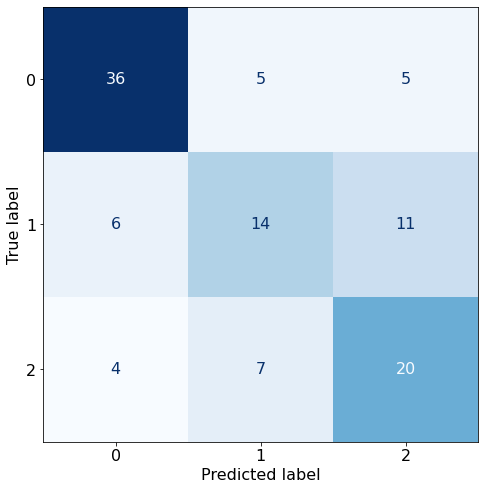

In [19]:
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(estimator=grid_model1,y_true=y1_test, X=X1_test, cmap='Blues', colorbar=False)

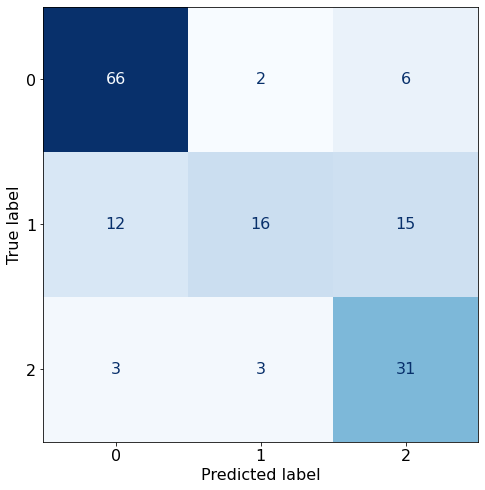

In [20]:
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(estimator=grid_model2,y_true=y2_test, X=X2_test, cmap='Blues', colorbar=False)